In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from nltk.probability import FreqDist

from matplotlib import pyplot as plt
import seaborn as sns

import math

# Load file

In [5]:
data = pd.read_csv('/content/drive/MyDrive/summer_project_2021/airbnb/listings.csv')

In [6]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77247,145.09232,Private room,60,1,4,2015-09-12,0.03,1,365
1,10803,Room in Cool Deco Apartment in Brunswick East,38901,Lindsay,NaN,Moreland,-37.76606,144.97951,Private room,28,4,145,2019-12-17,2.26,1,278
2,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.85999,144.97662,Entire home/apt,95,3,42,2016-01-25,0.76,10,0
3,33111,Million Dollar Views Over Melbourne,143550,Paul,NaN,Melbourne,-37.82163,144.96672,Private room,1000,1,2,2012-01-27,0.02,1,365
4,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.05725,145.33936,Entire home/apt,101,1,161,2020-01-09,1.25,1,329


In [7]:
data.shape
# 18605, 16

(18605, 16)

In [8]:
neighbourhood = data.neighbourhood.value_counts().to_frame()
neighbourhood.reset_index(level=0, inplace=True)
neighbourhood

,index,neighbourhood
0,Melbourne,5430
1,Port Phillip,2256
2,Yarra,1432
3,Stonnington,1277
4,Yarra Ranges,793
5,Moreland,780
6,Monash,589
7,Darebin,578
8,Boroondara,534
9,Glen Eira,519


## Geo


In [9]:
# !pip install geopandas

     |████████████████████████████████| 1.0 MB 22.7 MB/s 
     |████████████████████████████████| 15.4 MB 49.2 MB/s 
     |████████████████████████████████| 6.3 MB 52.0 MB/s 


In [10]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 15]

In [11]:
neigeo = geopandas.read_file("/content/drive/MyDrive/summer_project_2021/airbnb/neighbourhoods.geojson")

In [12]:
neigeo

,neighbourhood,neighbourhood_group,geometry
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255..."
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654..."
2,Hume,None,"MULTIPOLYGON (((144.67238 -37.56779, 144.67127..."
3,Hobsons Bay,None,"MULTIPOLYGON (((144.90275 -37.84707, 144.90339..."
4,Kingston,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14190..."
5,Maribyrnong,None,"MULTIPOLYGON (((144.90263 -37.78966, 144.90261..."
6,Monash,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.13654..."
7,Nillumbik,None,"MULTIPOLYGON (((145.06784 -37.68664, 145.06824..."
8,Whittlesea,None,"MULTIPOLYGON (((145.06784 -37.68664, 145.06767..."
9,Yarra,None,"MULTIPOLYGON (((145.04020 -37.78422, 145.04014..."


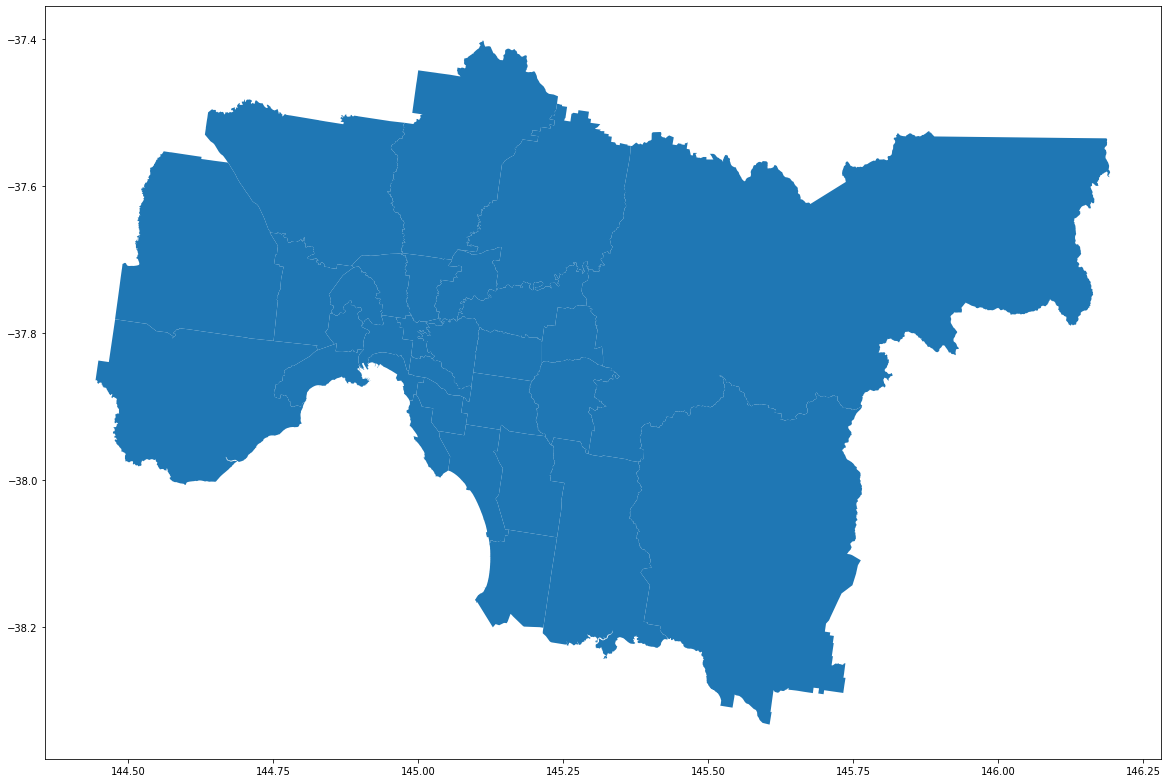

In [13]:
neigeo.plot()

In [14]:
# neighbourhood
nei_count = neighbourhood
nei_count.rename(columns={'index': 'neighbourhood', 'neighbourhood': 'count'}, inplace=True)

In [15]:
nei_count

,neighbourhood,count
0,Melbourne,5430
1,Port Phillip,2256
2,Yarra,1432
3,Stonnington,1277
4,Yarra Ranges,793
5,Moreland,780
6,Monash,589
7,Darebin,578
8,Boroondara,534
9,Glen Eira,519


In [16]:
nei_joined = neigeo.merge(nei_count, on='neighbourhood')

In [17]:
nei_joined

,neighbourhood,neighbourhood_group,geometry,count
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255...",139
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654...",465
2,Hume,None,"MULTIPOLYGON (((144.67238 -37.56779, 144.67127...",144
3,Hobsons Bay,None,"MULTIPOLYGON (((144.90275 -37.84707, 144.90339...",199
4,Kingston,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14190...",263
5,Maribyrnong,None,"MULTIPOLYGON (((144.90263 -37.78966, 144.90261...",417
6,Monash,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.13654...",589
7,Nillumbik,None,"MULTIPOLYGON (((145.06784 -37.68664, 145.06824...",89
8,Whittlesea,None,"MULTIPOLYGON (((145.06784 -37.68664, 145.06767...",138
9,Yarra,None,"MULTIPOLYGON (((145.04020 -37.78422, 145.04014...",1432


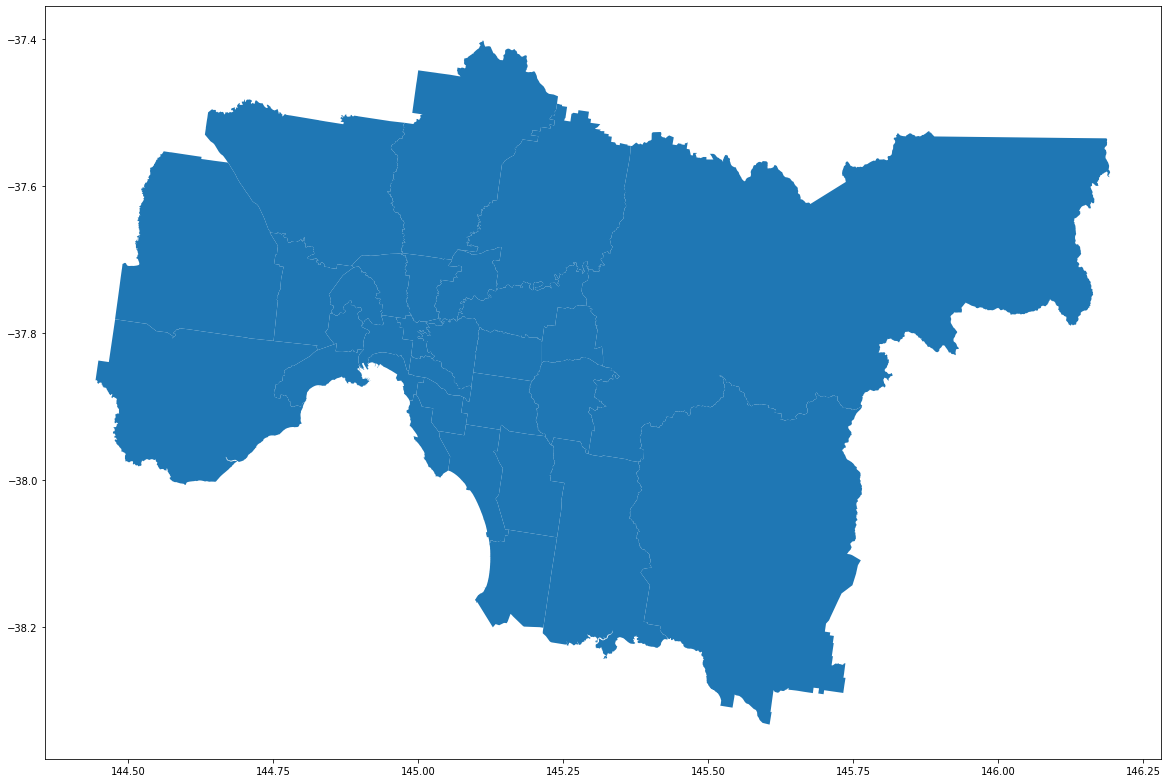

In [18]:
nei_joined.plot()

In [19]:
nei_joined = neigeo.merge(nei_count, on='neighbourhood', how='left')

In [20]:
nei_joined

,neighbourhood,neighbourhood_group,geometry,count
0,Greater Dandenong,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14255...",139
1,Wyndham,None,"MULTIPOLYGON (((144.82749 -37.82280, 144.82654...",465
2,Hume,None,"MULTIPOLYGON (((144.67238 -37.56779, 144.67127...",144
3,Hobsons Bay,None,"MULTIPOLYGON (((144.90275 -37.84707, 144.90339...",199
4,Kingston,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.14190...",263
5,Maribyrnong,None,"MULTIPOLYGON (((144.90263 -37.78966, 144.90261...",417
6,Monash,None,"MULTIPOLYGON (((145.14170 -37.93139, 145.13654...",589
7,Nillumbik,None,"MULTIPOLYGON (((145.06784 -37.68664, 145.06824...",89
8,Whittlesea,None,"MULTIPOLYGON (((145.06784 -37.68664, 145.06767...",138
9,Yarra,None,"MULTIPOLYGON (((145.04020 -37.78422, 145.04014...",1432


In [21]:
# nei_joined['count'].fillna(0, inplace=True)
nei_joined['count'] = nei_joined['count'].astype('int')

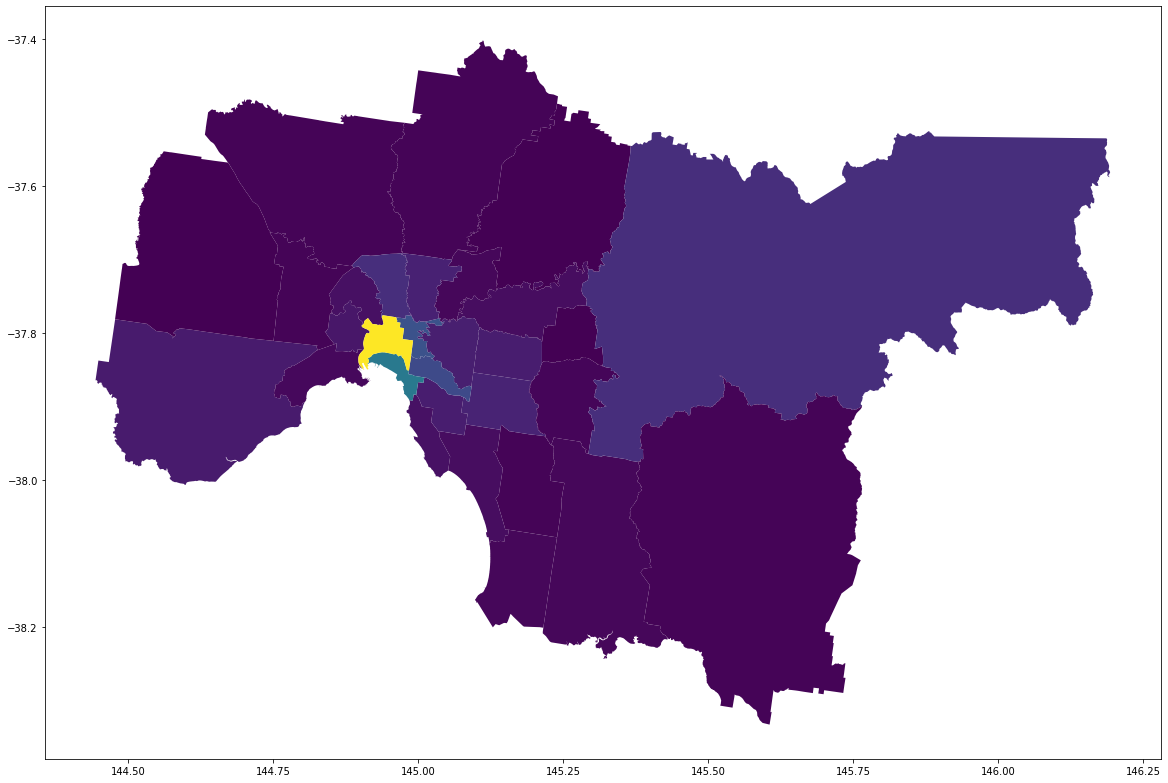

In [22]:
nei_joined.plot(column='count')

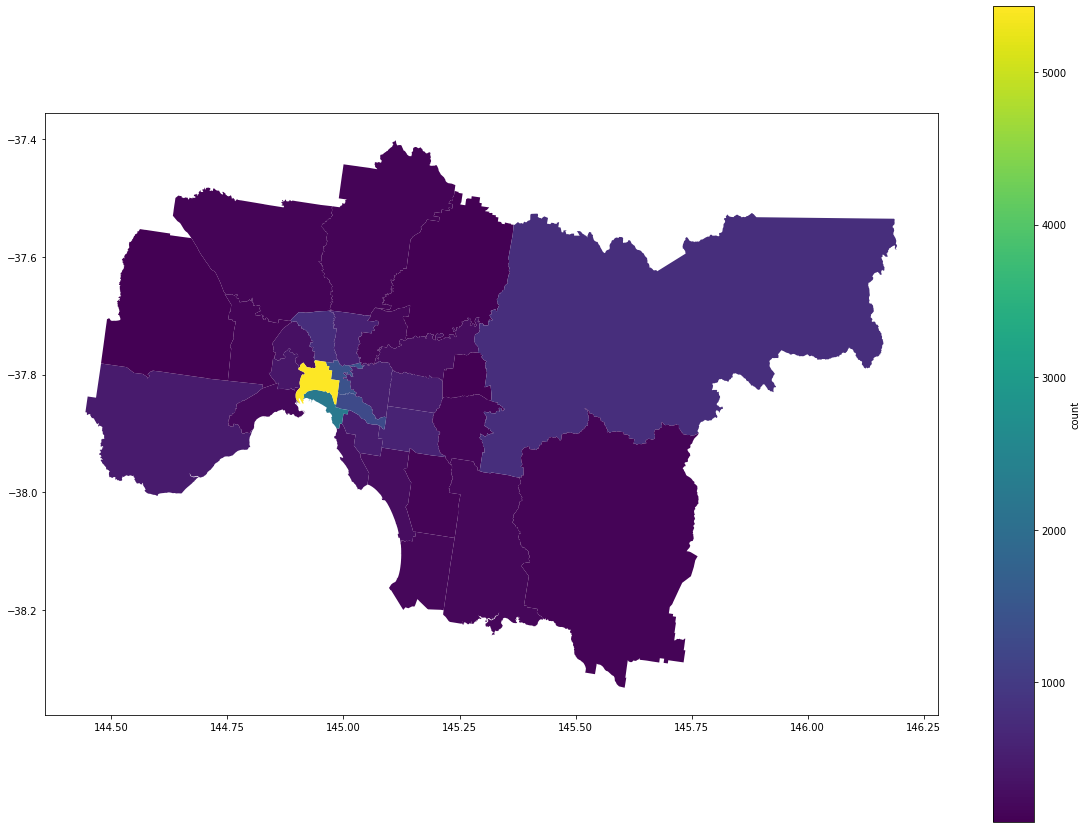

In [23]:
fig_leg, ax_leg = plt.subplots(1,1)
nei_joined.plot(column='count', ax=ax_leg, legend=True, legend_kwds={'label':'count', 'orientation':'vertical'})